In [18]:
import pandas as pd
import sys
import pickle
import seaborn as sns

sys.path.insert(1, '../')
from Prepare_Events_Functions import *

In [1]:
color_mapping_timeperiod = {
    'Present': (1.0, 0.6471, 0.0, 0.6), # orange with 0.6 alpha
    'Future': (0.0, 0.0, 1.0, 0.6)}     # blue with 0.6 alpha}

present_future_lookup = {'bc005': 'Present','bc006': 'Present','bc007': 'Present','bc009': 'Present','bc010': 'Present',
                         'bc011': 'Present', 'bc012': 'Present','bc013': 'Present','bc015': 'Present','bc016': 'Present', 
                         'bc017': 'Present','bc018': 'Present',
                        'nimrod': 'NIMROD',
                        'bb189': 'Future', 'bb192': 'Future','bb195': 'Future','bb198': 'Future','bb201': 'Future',
                        'bb204': 'Future','bb208': 'Future','bb211': 'Future','bb216': 'Future','bb219': 'Future',
                        'bb222': 'Future', 'bb225': 'Future'}

ids = ['nimrod', 
       'bc005', 'bc006', 'bc007', 'bc009', 'bc010','bc011', 'bc012','bc013','bc015', 'bc016', 'bc017', 'bc018',
       'bb189','bb192', 'bb195', 'bb198', 'bb201', 'bb204','bb208' ,'bb211','bb216', 'bb219','bb222','bb225']

# Read in data
For events with n data points which is a multiple of 5

In [9]:
with open("/nfs/a319/gy17m2a/PhD/ProcessedData/Profiles/All_30mins/dataframes.pkl", 'rb') as file:
    dataframes = pickle.load(file)  

In [10]:
present_ids = [id for id in ids if present_future_lookup.get(id) == 'Present']
present_dataframes = pd.concat([dataframes[id] for id in present_ids], ignore_index=True)

future_ids = [id for id in ids if present_future_lookup.get(id) == 'Future']
future_dataframes = pd.concat([dataframes[id] for id in future_ids], ignore_index=True)

### Create dataframes for plotting boxplots

In [36]:
# Percentage of events with each duration, for each ensemble member
combined_df_durations = prepare_combined_data(dataframes, 'duration', ids, present_future_lookup)
# Percentage of events within each duration bin, for each ensemble member
combined_df_durations_notpersonalised = prepare_combined_data(dataframes, 'DurationRange_notpersonalised', ids, present_future_lookup)
combined_df_durations_personalised = prepare_combined_data(dataframes, 'DurationRange_personalised_allems', ids, present_future_lookup)

### Create versions of these boxplot dataframes, containing just data for the present or just data from the future

In [ ]:
combined_df_durations_present =combined_df_durations[combined_df_durations['TimePeriod']=='Present'] 
combined_df_durations_future =combined_df_durations[combined_df_durations['TimePeriod']=='Future'] 

## Do durations of AMAX events change in the future?

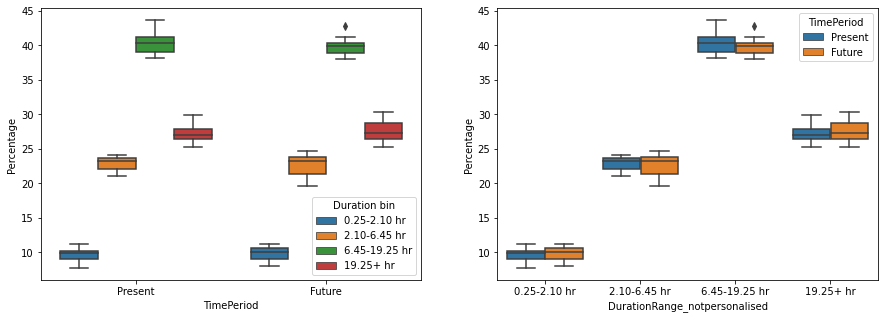

In [40]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.boxplot(ax=axs[0],data=combined_df_durations_notpersonalised, x='TimePeriod', y='Percentage', hue='DurationRange_notpersonalised');
axs[0].legend(title='Duration bin')
sns.boxplot(ax=axs[1],data=combined_df_durations_notpersonalised, x='DurationRange_notpersonalised', y='Percentage', hue='TimePeriod');

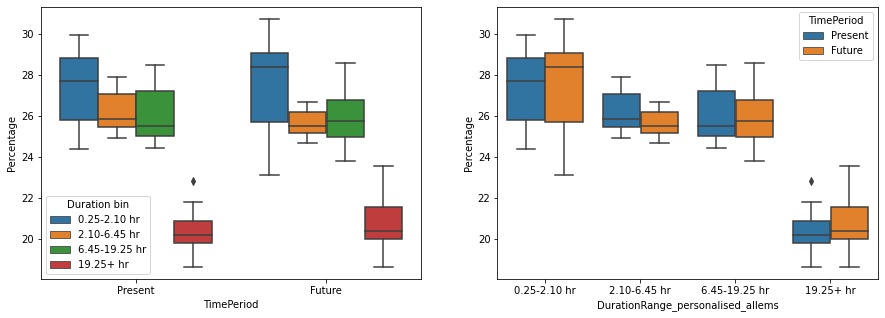

In [41]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.boxplot(ax=axs[0],data=combined_df_durations_personalised, x='TimePeriod', y='Percentage', hue='DurationRange_personalised_allems');
axs[0].legend(title='Duration bin')
sns.boxplot(ax=axs[1],data=combined_df_durations_personalised, x='DurationRange_personalised_allems', y='Percentage', hue='TimePeriod');

## Distribution of distributions for NIMROD vs UKCP18 present vs UKCP18 future

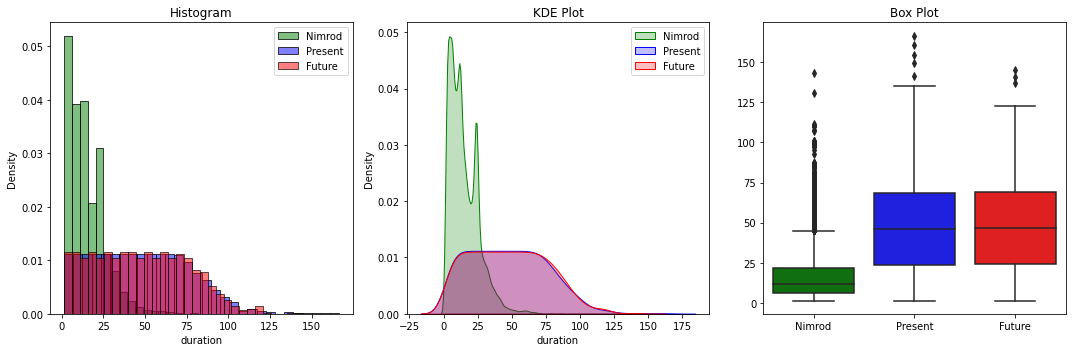

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram
sns.histplot(dataframes['nimrod']['duration'], bins=30, color='green', alpha=0.5, label='Nimrod', ax=axes[0], stat='density')
sns.histplot(combined_df_durations_present['duration'], bins=30, color='blue', alpha=0.5, label='Present', ax=axes[0], stat='density')
sns.histplot(combined_df_durations_future['duration'], bins=30, color='red', alpha=0.5, label='Future', ax=axes[0], stat='density')
axes[0].set_title('Histogram')
axes[0].legend()

# KDE Plot
sns.kdeplot(dataframes['nimrod']['duration'], color='green', shade=True, label='Nimrod', ax=axes[1])
sns.kdeplot(combined_df_durations_present['duration'], color='blue', shade=True, label='Present', ax=axes[1])
sns.kdeplot(combined_df_durations_future['duration'], color='red', shade=True, label='Future', ax=axes[1])
axes[1].set_title('KDE Plot')
axes[1].legend()

# Box Plot
sns.boxplot(data=[dataframes['nimrod']['duration'], combined_df_durations_present['duration'], 
                  combined_df_durations_future['duration']], palette=['green','blue', 'red'], ax=axes[2])
axes[2].set_xticklabels(['Nimrod','Present', 'Future'])
axes[2].set_title('Box Plot')

plt.tight_layout()
plt.show()